# RLab02 - Gabriele Bertinelli (1219907 - tri)

In [2]:
library(tidyverse)
library(ggplot2)
library(dplyr)
library(scales)
library(lubridate)
library(cowplot)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.1     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor



Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp




# 1)

## 1.1)

In [11]:
# Defining the PDF

my_pdf <- function(k) {
  p <- ifelse(k<=5&k>=1, k/15, 0)
  return(p)
}

In [12]:
my_pdf(5)

[1] 0.3333333

In [13]:
# Defining the CDF

my_cdf <- function(k) {
  if (k<1 & k>5) {
    return(0)
  } else {
    cdf <- 0
    for (i in 0:k) {
      cdf <- cdf + my_pdf(i)
    }
    return(cdf)
  }
}

## 1.2)

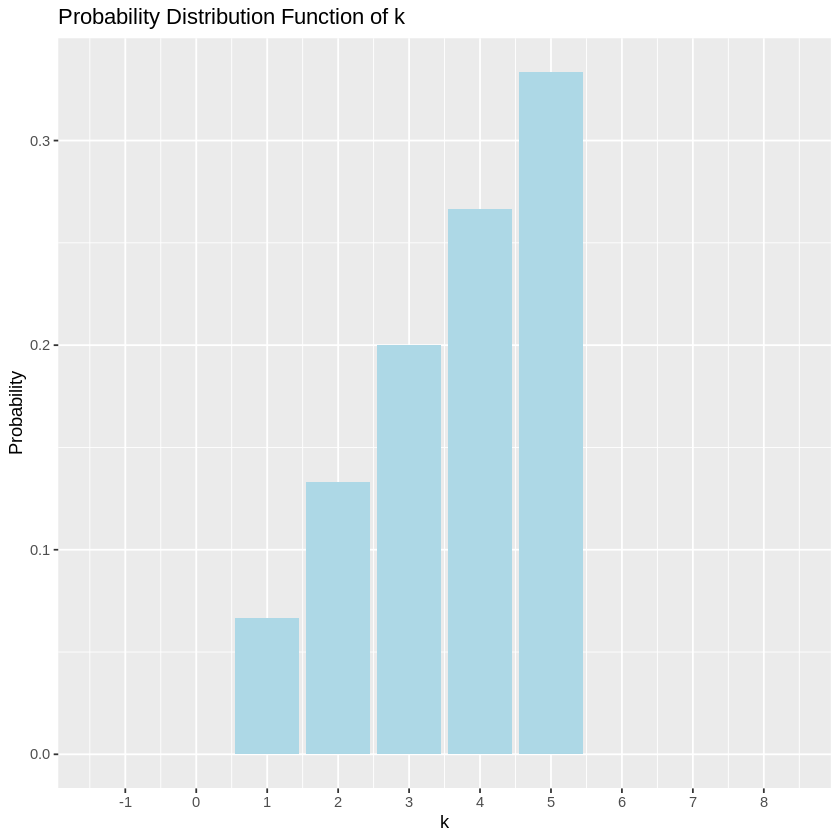

In [16]:
# Create a plot for the PDF

df <- data.frame(k = -1:8, prob = sapply(-1:8, my_pdf))

pdf1_plot <- ggplot(df, aes(x = k, y = prob)) +
  geom_bar(stat = "identity", fill='lightblue') +
  labs(x = "k", y = "Probability", title = "Probability Distribution Function of k")+
  scale_x_continuous(breaks = pretty(df$k, n = length(df$k)))

pdf1_plot
ggsave("pdf1_plot.png", pdf1_plot, width =10, height = 8, dpi = 300)

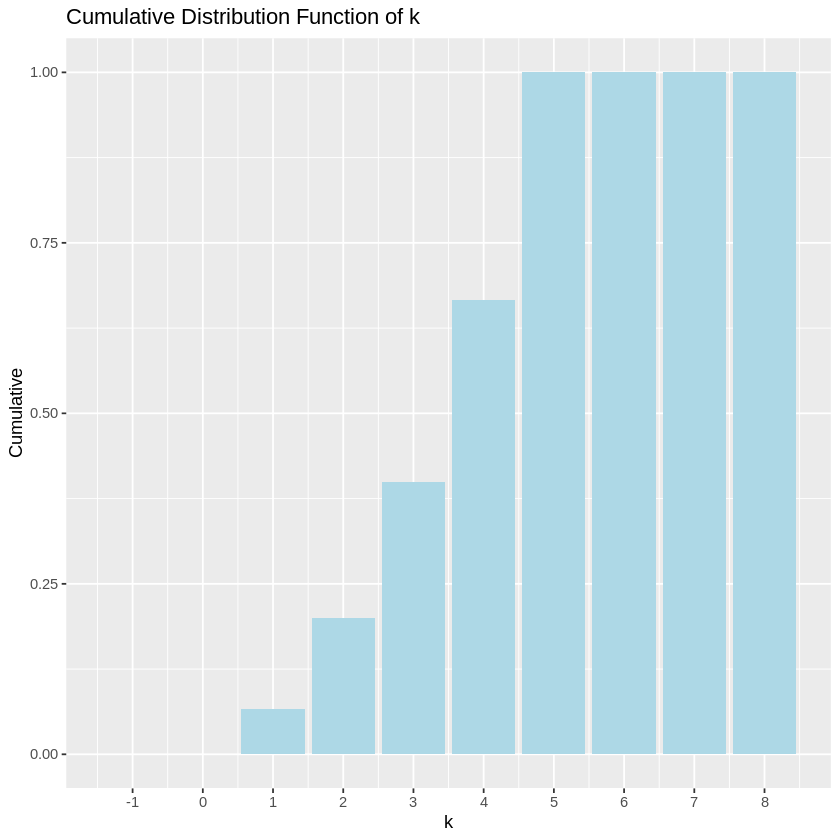

In [18]:
# Create a plot for the CDF

df <- data.frame(k = -1:8, prob = sapply(-1:8, my_cdf))

cdf1_plot <- ggplot(df, aes(x = k, y = prob)) +
  geom_bar(stat = "identity", fill='lightblue') +
  labs(x = "k", y = "Cumulative", title = "Cumulative Distribution Function of k")+
  scale_x_continuous(breaks = pretty(df$k, n = length(df$k))) 

cdf1_plot
ggsave("cdf1_plot.png", cdf1_plot, width =10, height = 8, dpi = 300)

## 1.3)

In [23]:
# Computing mean and variance of PDF
k_values <- -1:8
probs <- sapply(k_values, my_pdf)

mean_value <- sum(k_values * probs)
variance <- sum((k_values - mean_value)^2 * probs)

cat(paste('mean value=', round(mean_value, 3),'\n'))
cat(paste('variance=', round(variance, 3)))

mean value= 3.667 
variance= 1.556

## 1.4)

In [28]:
# Computing the expected value E[k(6-k)]

k_values <- -1:100
X <- k_values*(6-k_values)
probs <- sapply(X, my_pdf)

exp_val <- sum(probs*X) 
cat(paste('Expected value E[k(6 − k)]=', round(exp_val,3)))

Expected value E[k(6 − k)]= 3.333

## 1.5)

In [39]:
k_values <- 0:6
probs <- sapply(k_values, my_pdf)


# Function that sample random numbers from the PDF
rnd_from_pdf <- function(n_sample) {
  sample(k_values, size = n_sample, replace = TRUE, prob = probs)
}

## 1.6)

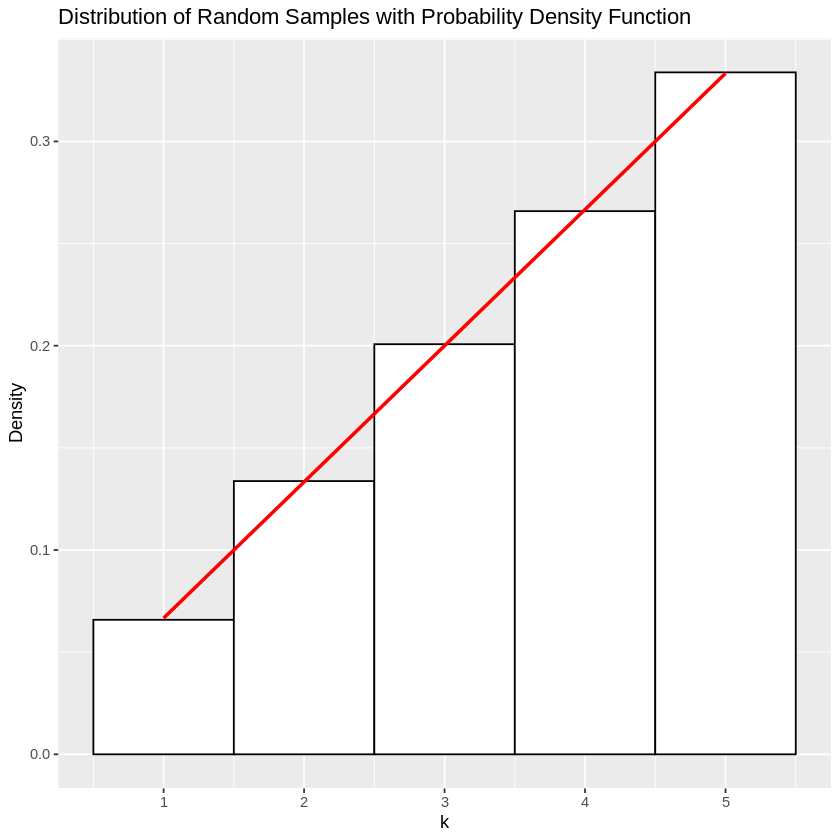

In [53]:
samples <- rnd_from_pdf(10^5)
df <- data.frame(samples = samples)

# Create a histogram of the samples with the probability density function superimposed
rnd_sample1 <- ggplot(df, aes(x = samples)) +
  geom_histogram(aes(y = ..density..), color = "black", fill = "white", bins = 5) +
  stat_function(fun = my_pdf, color = "red", lwd=1) +
  labs(x = "k", y = "Density", title = "Distribution of Random Samples with Probability Density Function")

rnd_sample1
ggsave("rnd_sample1.png", rnd_sample1, width =10, height = 8, dpi = 300)

# 2)

## 2.1)

In [164]:
tri_dist <- function(n, a, b, c) {
    d <- ifelse(n >= a & n <= b, 
                ifelse(n < c, 2*(n-a)/((b-a)*(c-a)), 2*(b-n)/((b-a)*(b-c)) ),
                0)
    return(d)
    }

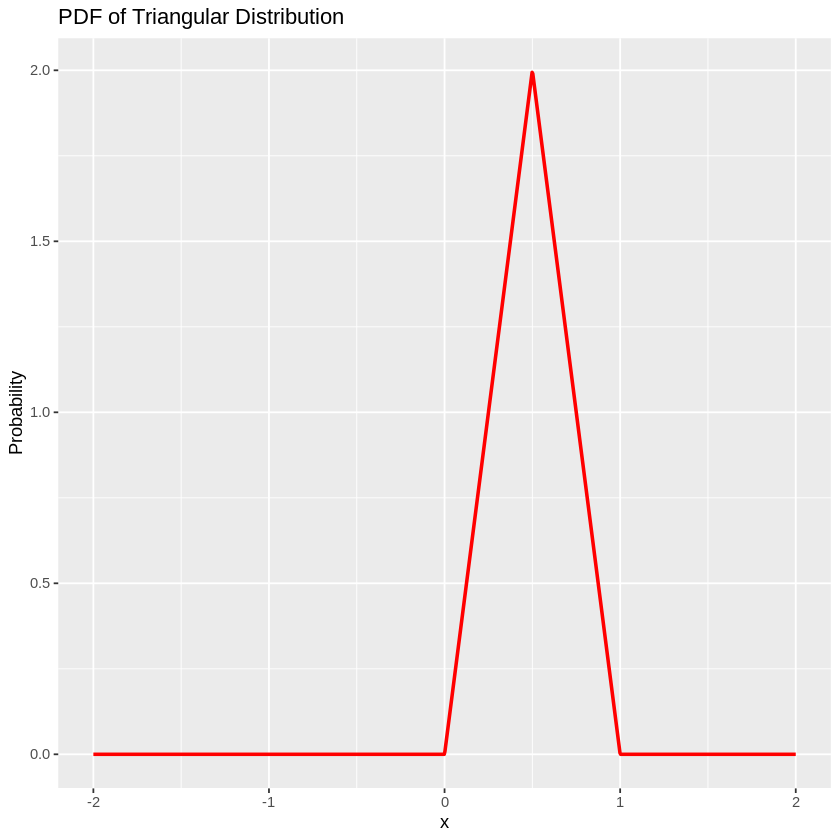

In [167]:
a <- 0; b <- 1; c <- (a+b)/2
x <- seq(-2, 2, length.out = 1000)

tri_plot <- ggplot() +
  geom_line(aes(x = x, y = tri_dist(x, a, b, c)), color = "red", linewidth = 1) +
  labs(x = "x", y = "Probability", title = "PDF of Triangular Distribution")

tri_plot

ggsave("tri_plot.png", tri_plot, width =10, height = 8, dpi = 300)

## 2.2)

In [168]:
# Cumulative distribution

tri_cum <- function(n, a, b, c){
    p2 <- ifelse(n >= a & n <= b, 
                ifelse(n <c, (n**2 - 2*a*c)/((b-a)*(c-a)), (2*b*n-n**2)/((b-a)*(b-c))-1),
                ifelse(n < a, 0, 1))
    return (p2)
    }

In [181]:
# Sample from triangular distribution
set.seed(1234)
tri_sample <- function(n){
    S = runif(min=0, max=1, n)
    t <- c()
    for(s in S){
        if(s <= tri_cum(c, a, b, c)){
            t <-c(t, sqrt(s*(b-a)*(c-a) + a**2) + a) 
            }
        else{ 
            t <- c(t, -sqrt(b**2 -(s+1)*(b-a)*(b-c))+ b)
            }
        }
    return(t)
    }

## 2.3)

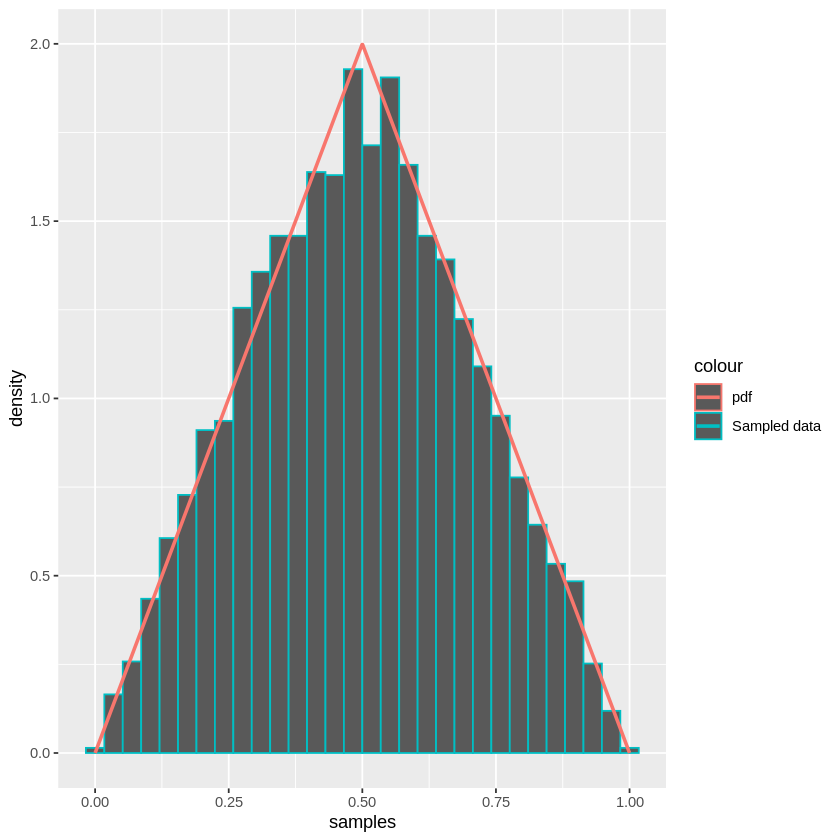

In [185]:
x_samples <- seq(a, b, length.out = 1000)
samples <- tri_sample(10**4)

tri_s_plot <- ggplot()+
    geom_histogram(aes(samples, y=after_stat(density), colour='Sampled data'), bins=30) +
    geom_line(aes(x=x_samples, y=tri_dist(x_samples,a,b,c), colour='pdf'), lwd=1)

tri_s_plot

ggsave("tri_s_plot.png", tri_s_plot, width =10, height = 8, dpi = 300)

# 3)

## 3.1)

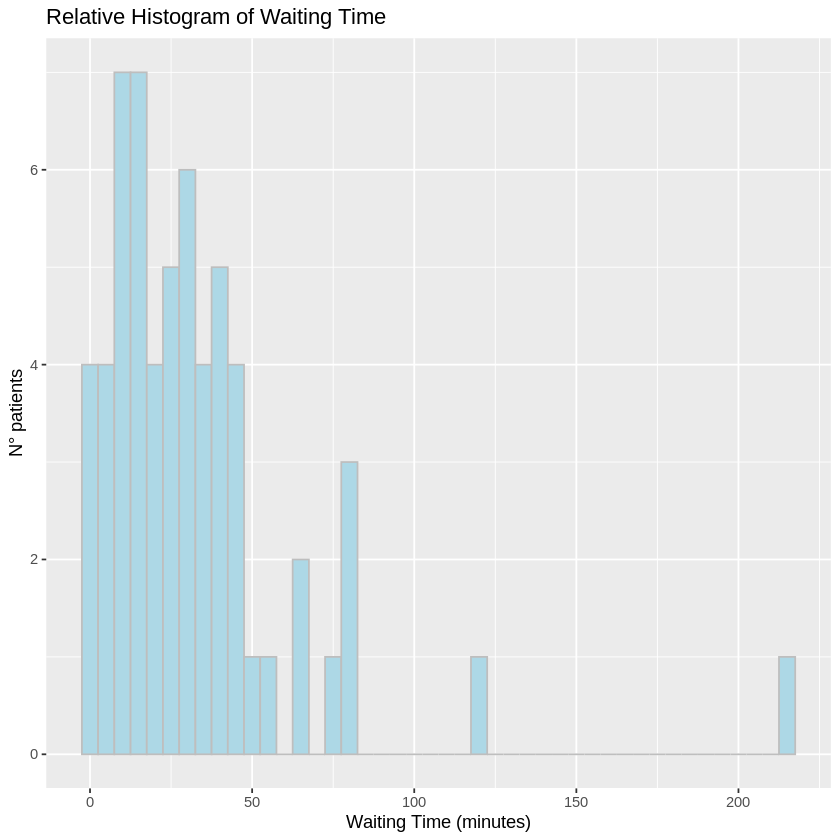

In [215]:
set.seed(123)
n <- 60

# Generate 60 random numbers from an exponential distribution with rate parameter 1/30 using the rexp()
wait_time_df <- rexp(n, rate = lambda)

df <- data.frame(wait_time_df)

wait_plot <- ggplot(df, aes(x = wait_time_df)) +
  geom_histogram(binwidth = 5, aes(y = ..count..,), color = "grey", fill = "lightblue") +
  labs(x = "Waiting Time (minutes)", y = "N° patients", title = "Relative Histogram of Waiting Time")
wait_plot

ggsave("wait_plot.png", wait_plot, width =10, height = 8, dpi = 300)

## 3.2)

In [216]:
# The probability that a person will wait for less than 12 minutes is given by 
# the cumulative distribution function of the exponential distribution:

wait_time <- 12

p_wait <- pexp(wait_time, rate = lambda)

cat(paste('The probability that a person will wait for less than 12 minutes is', round(p_wait, 4)*100),'%')

The probability that a person will wait for less than 12 minutes is 32.97 %

## 3.3)

In [221]:
# To evaluate the average waiting time from the simulated data, we can use the mean()

mean_wait <- mean(wait_time_df)

# The expected value of the waiting time for an exponential distribution 
# with rate parameter lambda is equal to 1/lambda

expected_value <- 1/(lambda)

cat(paste('The average waiting time is', round(mean_wait, 2), 'min\n'))
cat(paste('The expected value is', round(expected_value, 2), 'min'))

The average waiting time is 33.19 min
The expected value is 30 min

## 3.4)

In [222]:
# Probability that a person will wait for more than 60 minutes

wait_60 <- pexp(60, rate = 1/30, lower.tail = FALSE) #lower.tail=FALSE for the prob at 60 mins or more

cat(paste('The probability to wait more than 60 mins is', round(wait_60, 4)*100, '%'))

The probability to wait more than 60 mins is 13.53 %

# 4)

Let `K` be the event that the student knows the answer, and `R` be the event that the student selects the answer randomly. Let `C` be the event that the student gives a correct answer. Then, we want to find `P(K|C)`, the probability that the student really knew the correct answer, given that a correct answer was given.

By Bayes' theorem, we have:

```
P(K|C) = P(C|K) * P(K) / P(C)

```

where `P(C|K)` is the probability that the student gives a correct answer, given that they know the answer, `P(K)` is the prior probability that the student knows the answer, and `P(C)` is the marginal probability of giving a correct answer, which can be calculated using the law of total probability:

```
P(C) = P(C|K) * P(K) + P(C|R) * P(R)

```

where `P(C|R)` is the probability of giving a correct answer, given that the student selects the answer randomly, and `P(R)` is the prior probability that the student selects the answer randomly.

We can assume that the probability of giving a correct answer, given that the student knows the answer, is `1`, and the probability of giving a correct answer, given that the student selects the answer randomly, is `1/5`, since there are 5 possible alternatives and only one is correct.

Therefore, we can calculate `P(C)` as:

```
P(C) = 1 * 0.7 + 1/5 * 0.3 = 0.76

```

We can then substitute `P(C|K) = 1`, `P(K) = 0.7`, and `P(C) = 0.76` into Bayes' theorem:

```
P(K|C) = 1 * 0.7 / 0.76 = 0.9210526

```

Therefore, the probability that the student really knew the correct answer, given that a correct answer was given, is approximately 0.9211, or 92.11%.

In [228]:
# Using the definitions given above

p_knows <- 0.7 #P(K)
p_random <- 1 - p_knows #P(R)
p_correct_given_knows <- 1 #P(C|K)
p_correct_given_random <- 1/5 #P(C|R)

p_correct <- p_correct_given_knows * p_knows + p_correct_given_random * p_random #P(C)

p_knows_given_correct <- p_correct_given_knows * p_knows / p_correct #P(K|C)

cat(paste('The probability that the student really knew the correct answer is', round(p_knows_given_correct, 4)*100, '%'))

The probability that the student really knew the correct answer is 92.11 %

# 5) 

In [230]:
p_wait_10min <- (1/2) * (10/60) + (1/2) * (20/60)
p_wait_10min*100

[1] 25

In [231]:
p_wait_15min <- (1/2) * ((20+30)/60) + (1/2) * ((60-20-10)/60)
p_wait_15min*100


[1] 66.66667

To find the expected value of the waiting time (i.e., the average time spent waiting), we can use the law of total probability and the formula for the expected value of a continuous random variable:

```
E(W) = E(T) - E(A)

```

where `E(W)` is the expected value of the waiting time, `E(T)` is the expected value of the time between trains, and `E(A)` is the expected value of the arrival time.

In [244]:
# Expected value of the time between trains
E_T <- (1/2) * 30 + (1/2) * 60

# Expected value of the arrival time
E_A <- as.POSIXct("10:45", format="%H:%M:%S") + as.POSIXct("11:45", format="%H:%M:%S")

# expected value of the waiting time
E_W <- difftime(E_T, E_A/2, units = "mins")
E_W

ERROR: Error in `+.POSIXt`(as.POSIXct("10:45", format = "%H:%M:%S"), as.POSIXct("11:45", : binary '+' is not defined for "POSIXt" objects


In [241]:
a <- (10.75 + 11.75) / 2
a

[1] 11.25

# 6)

Let `X` be the random variable representing the annual return rate of the stock. We are given that `X` is a normal variable with mean `mu = 0.1` and standard deviation `sigma = 0.12`

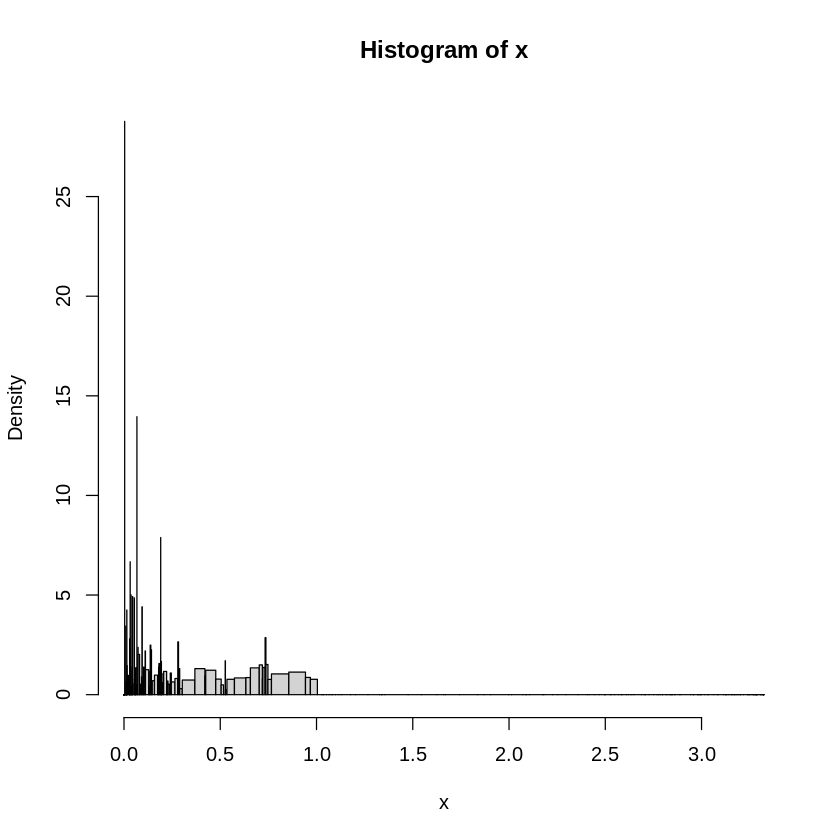

In [255]:
x <- runif(500)
ciao <- dnorm(x, mean = 0.1, sd = 0.12)
hist(x, ciao)

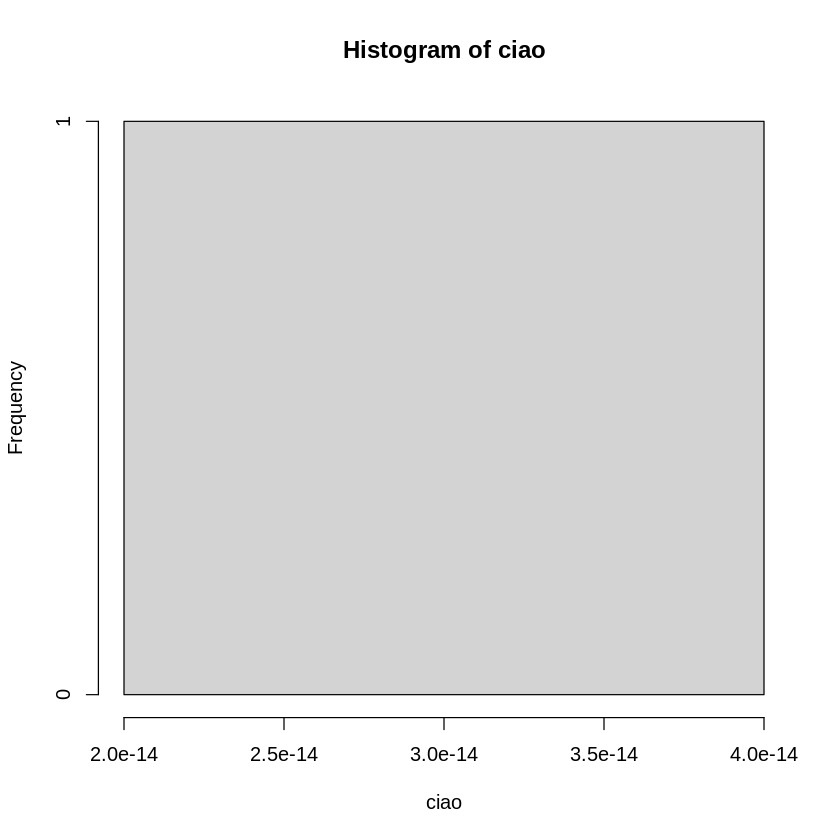

In [290]:
q <- dnorm(800, mean=80, sd=96)

ciao <- pnorm(800, mean = 80, sd = 96, lower.tail = FALSE)

# Resume

In [297]:
library(gridExtra)
l <- list(pdf1_plot, rnd_sample1, tri_plot, tri_s_plot, wait_plot)
ggsave('ex2_plot_resume.pdf', width = 9, height = 9, dpi=300, marrangeGrob(grobs = l, nrow=2, ncol=1), device = "pdf")